In [32]:
import torch
import torchvision
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

from dlvc.datasets.dataset import Subset
from dlvc.datasets.cifar10 import CIFAR10Dataset

In [2]:
fdir = "data\\cifar-10-batches-py"

transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [27]:
augmentation_transform = v2.Compose([
    v2.ToImage(),
    # Randomly flip the image horizontally
    v2.RandomHorizontalFlip(),
    # Randomly rotate the image
    v2.RandomRotation(120),
    # Randomly crop and resize
    v2.RandomResizedCrop(32, scale=(0.6, 1.0), ratio=(0.8, 1.2)),
    # Convert the image to a PyTorch tensor
    v2.ToDtype(torch.float32, scale=True),
    # Normalize the image with mean and standard deviation
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [28]:
training_data = CIFAR10Dataset(fdir=fdir, subset=Subset.TRAINING, transform=transform, augmentation_transform=augmentation_transform, augment_probability=0.5)
validation_data = CIFAR10Dataset(fdir=fdir, subset=Subset.VALIDATION)
test_data = CIFAR10Dataset(fdir=fdir, subset=Subset.TEST)

In [29]:
train_data_loader = torch.utils.data.DataLoader(training_data, batch_size=8, shuffle=False, num_workers=2)

In [13]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

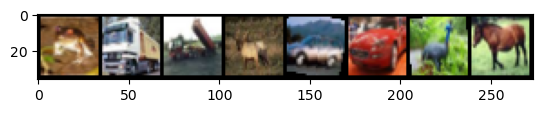

In [14]:
dataiter = iter(train_data_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


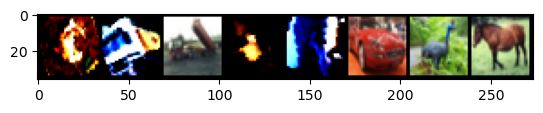

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


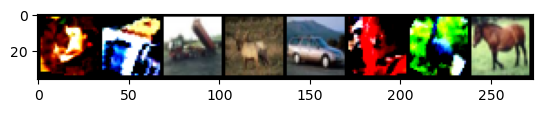

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


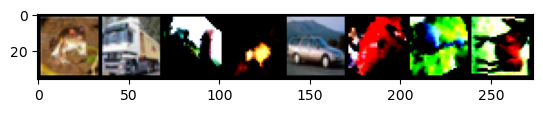

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


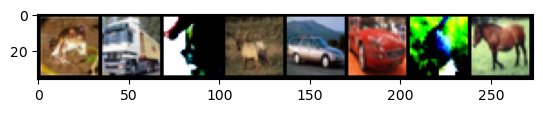

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


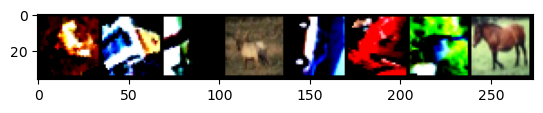

In [30]:
for epoch in range(5):
    show = True
    for i, data in enumerate(train_data_loader, 0):
        inputs, labels = data
        if show:
            imshow(torchvision.utils.make_grid(inputs))
            show = False
        pass

In [16]:
for epoch in range(5):
    cnt = 0
    for i, (images, labels) in enumerate(train_data_loader):
        cnt += 1

In [49]:
m = nn.Softmax(-1)

In [50]:
input = torch.randn(2, 3)
m(input)

tensor([[0.2212, 0.2743, 0.5045],
        [0.0776, 0.3404, 0.5819]])

In [47]:
input.softmax(-1)

tensor([[0.2728, 0.1365, 0.5908],
        [0.5688, 0.1167, 0.3145]])